In [ ]:
import torch
from torch.utils.data import DataLoader
from train import Trainer
from generator import *
from discriminator import GAN
from dataset import CocoStuffDataSet
import os, argparse, datetime, json

from utils import *
NUM_CLASSES = 11
SAVE_DIR = "../checkpoints" # Assuming this is launched from code/ subfolder.
experiment_name = 'gan'
experiment_dir = os.path.join(SAVE_DIR, experiment_name)
batch_size = 1

In [4]:
HEIGHT, WIDTH = 128, 128
generator = SegNet16(NUM_CLASSES)
image_shape = (3, HEIGHT, WIDTH)
segmentation_shape = (NUM_CLASSES, HEIGHT, WIDTH)
discriminator = GAN(NUM_CLASSES, segmentation_shape, image_shape)

val_loader = DataLoader(CocoStuffDataSet(supercategories=['animal'], mode='val', height=HEIGHT, width=WIDTH),
                            batch_size, shuffle=False)
train_loader = DataLoader(CocoStuffDataSet(supercategories=['animal'], mode='train', height=HEIGHT, width=WIDTH),
                            batch_size, shuffle=True)
trainer = Trainer(generator, discriminator, train_loader, val_loader, \
                experiment_dir=experiment_dir, resume=True)


44
loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
Loaded 1016 samples: 
loading annotations into memory...
Done (t=16.29s)
creating index...
index created!
Loaded 23989 samples: 
Using device cuda:0
=> loading checkpoint '../checkpoints/gan/ckpt.pth.tar'
=> loaded checkpoint '../checkpoints/gan/ckpt.pth.tar' (iter 339)


(128, 128)


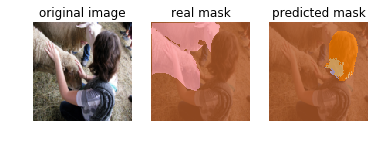

(128, 128)


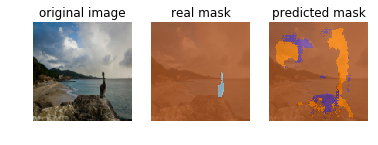

(128, 128)


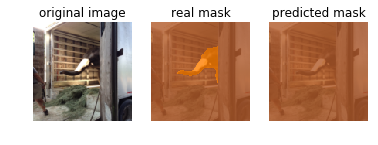

(128, 128)


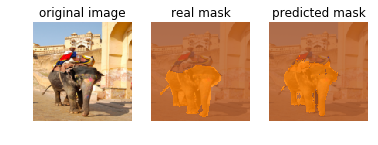

(128, 128)


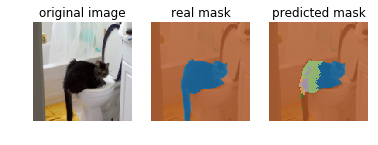

(128, 128)


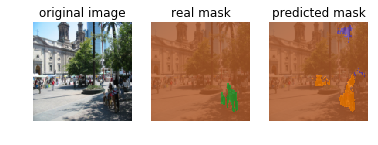

(128, 128)


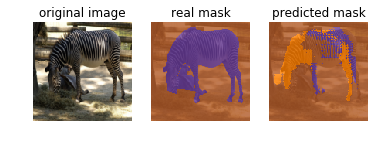

(128, 128)


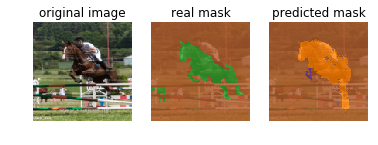

(128, 128)


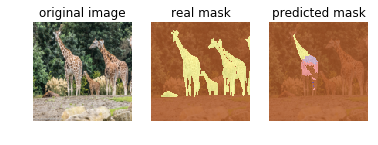

(128, 128)


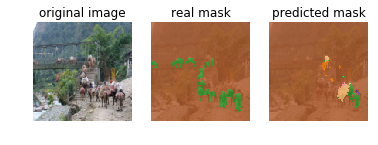

Evaluating mean IOU
Val meanIOU without background: 0.33028782159273373
Evaluating mean IOU


KeyboardInterrupt: 

In [7]:

# just do evaluation
# trainer.evaluate_meanIOU(train_loader, debug=True)

# print("Ignoring background")
# train_acc = trainer.evaluate_pixel_accuracy(train_loader, ignore_background=True)
# val_acc = trainer.evaluate_pixel_accuracy(val_loader, ignore_background=True)
# print("Train pixel accuracy: {}".format(train_acc))
# print("Val pixel accuracy: {}".format(val_acc))

total = 0
for data, mask_gt, gt_visual in val_loader:
    if total < 10:      
        data = data.to(trainer.device)
        batch_size = data.size()[0]
        total += batch_size
        mask_pred = convert_to_mask(trainer._gen(data))
        for i in range(len(data)):
            img = data[i].detach().cpu().numpy()
            gt_mask = gt_visual[i].detach().cpu().numpy()
            pred_mask = np.argmax(mask_pred[i].detach().cpu().numpy(), axis=0)

            display_image = np.transpose(img, (1, 2, 0))
            plt.figure()

            plt.subplot(131)
            plt.imshow(display_image)
            plt.axis('off')
            plt.title('original image')
        
            cmap = discrete_cmap(NUM_CLASSES, 'Paired')
            norm = colors.NoNorm(vmin=0, vmax=NUM_CLASSES)

            plt.subplot(132)
            plt.imshow(display_image)
            print (gt_mask.shape)
            plt.imshow(gt_mask, alpha=0.8, cmap=cmap, norm=norm)
            plt.axis('off')
            plt.title('real mask')

            plt.subplot(133)
            plt.imshow(display_image)
            plt.imshow(pred_mask, alpha=0.8, cmap=cmap, norm=norm)
            plt.axis('off')
            plt.title('predicted mask')
            plt.show()
    else:
        break



In [ ]:
val_acc = trainer.evaluate_meanIOU(val_loader, ignore_background=True)
print("Val meanIOU without background: {}".format(val_acc))
train_acc = trainer.evaluate_meanIOU(train_loader, ignore_background=True)
print("Train meanIOU without background: {}".format(train_acc))

val_acc = trainer.evaluate_meanIOU(val_loader, ignore_background=False)
print("Val meanIOU with background: {}".format(val_acc))
train_acc = trainer.evaluate_meanIOU(train_loader, ignore_background=False)
print("Train meanIOU with background: {}".format(train_acc))